Using this dataset: https://www.kaggle.com/shivam2503/diamonds

-Apply dimensionality reduction techniques to visualize the observations.

-Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

# data cleaning

In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import time

In [2]:
df = pd.read_csv(r'C:\Users\ojiang1\Desktop\Data Science\Notes\6. Unsupevised learning_Clustering\diamonds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df=df.drop(['Unnamed: 0'],1)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# drop the value of 0 for x, y,z 
# cuz it does not make sense for Length or Width or Height to be zero

df = df[(df[['x','y','z']] != 0).all(axis=1)]

# double check
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
# Numeric Columns

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

numeric_columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
The number of numerical columns is 7


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [10]:
# NON-Numeric Columns

non_numeric_columns = df.select_dtypes(['object']).columns
len(non_numeric_columns)

non_numeric_columns = ['cut', 'color', 'clarity']
non_numeric_columns

['cut', 'color', 'clarity']

In [11]:
# transfer non numeric to dummy
non_numeric_columns

df = pd.concat([df, pd.get_dummies(df["cut"], prefix="cut", drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["color"], prefix="color",drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df["clarity"], prefix="clarity",drop_first=True)], axis=1)



# drop the character columns
df.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53920 non-null  float64
 1   depth          53920 non-null  float64
 2   table          53920 non-null  float64
 3   price          53920 non-null  int64  
 4   x              53920 non-null  float64
 5   y              53920 non-null  float64
 6   z              53920 non-null  float64
 7   cut_Good       53920 non-null  uint8  
 8   cut_Ideal      53920 non-null  uint8  
 9   cut_Premium    53920 non-null  uint8  
 10  cut_Very Good  53920 non-null  uint8  
 11  color_E        53920 non-null  uint8  
 12  color_F        53920 non-null  uint8  
 13  color_G        53920 non-null  uint8  
 14  color_H        53920 non-null  uint8  
 15  color_I        53920 non-null  uint8  
 16  color_J        53920 non-null  uint8  
 17  clarity_IF     53920 non-null  uint8  
 18  clarit

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,0.22,65.1,61.0,337,3.87,3.78,2.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.4,61.0,338,4.00,4.05,2.39,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Apply dimensionality reduction techniques to visualize the observations.

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.21277402 0.08188495 0.06105404 0.05462409]
Time elapsed: 0.1545865535736084 seconds


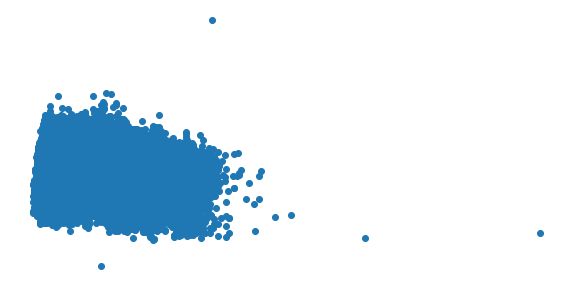

In [20]:
#PCA

standardscalar=StandardScaler()
df_scaler=standardscalar.fit_transform(df)

time_start = time.time()

pca = PCA(n_components=4)
pca_components = pca.fit_transform(df_scaler)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_
)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 53920 samples in 0.495s...
[t-SNE] Computed neighbors for 53920 samples in 122.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53920
[t-SNE] Computed conditional probabilities for sample 2000 / 53920
[t-SNE] Computed conditional probabilities for sample 3000 / 53920
[t-SNE] Computed conditional probabilities for sample 4000 / 53920
[t-SNE] Computed conditional probabilities for sample 5000 / 53920
[t-SNE] Computed conditional probabilities for sample 6000 / 53920
[t-SNE] Computed conditional probabilities for sample 7000 / 53920
[t-SNE] Computed conditional probabilities for sample 8000 / 53920
[t-SNE] Computed conditional probabilities for sample 9000 / 53920
[t-SNE] Computed conditional probabilities for sample 10000 / 53920
[t-SNE] Computed conditional probabilities for sample 11000 / 53920
[t-SNE] Computed conditional probabilities for sample 12000 / 53920
[t-SNE] Computed conditional probabilities for 

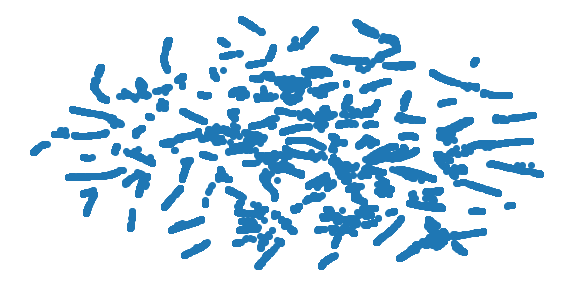

In [18]:
# t-SNE

from sklearn.manifold import TSNE

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(df_scaler)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Time elapsed: 44.18882203102112 seconds


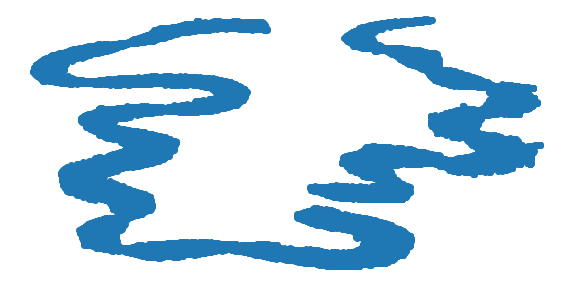

array([[11.369323  , 18.38518   ],
       [11.244682  , 18.286377  ],
       [11.221348  , 18.272179  ],
       ...,
       [ 0.8767732 , -7.0596    ],
       [-0.08893924, -7.276471  ],
       [-0.676596  , -6.716461  ]], dtype=float32)

In [21]:
# UMAP

import umap

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.1,
                      metric='correlation').fit_transform(df)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

umap_results

UMAP has the best result;
after adjusting the params for each dimention reduction tool, only UMAP able to distinguish between diff classes easily;
it is because the datasets are large with high dimensional data, and umap is better ar preserving the global structure of data than t-sne.

PCA, among all three, is the fastest, and UMAP is the second, while t-sne is the slowest. however for PCA it does not effectively reduce the dimention - the first 4 components explain less than half of the variance.

# Apply clustering techniques to group together similar observations.

In [14]:
df_scaler

array([[-1.19820422, -0.17420303, -1.09972532, ..., -0.54231053,
        -0.2696169 , -0.32201976],
       [-1.24041694, -1.36109047,  1.58598783, ..., -0.54231053,
        -0.2696169 , -0.32201976],
       [-1.19820422, -3.38578081,  3.37646327, ..., -0.54231053,
        -0.2696169 , -0.32201976],
       ...,
       [-0.20620543,  0.73341678,  1.13836898, ..., -0.54231053,
        -0.2696169 , -0.32201976],
       [ 0.13149629, -0.52328757,  0.24313126, ..., -0.54231053,
        -0.2696169 , -0.32201976],
       [-0.10067364,  0.31451533, -1.09972532, ..., -0.54231053,
        -0.2696169 , -0.32201976]])

803 ms ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


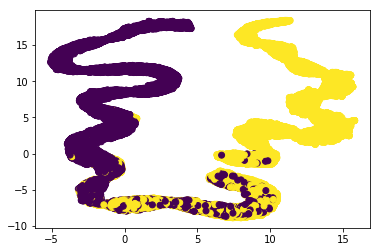

The silhoutte score is: 0.14425051419236964


In [25]:
# K means 
# tried n_clusters = 3,4,5. but 2 turns out the better one

from sklearn.cluster import KMeans
from sklearn import metrics

k_means = KMeans(n_clusters=2, random_state=123)
%timeit  k_means.fit(df_scaler)

clusters = k_means.predict(df_scaler)

plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

In [ ]:
# Hierarchical clustering  

from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=10)
%timeit agg_cluster.fit(df_scaler)

clusters = agg_cluster.fit_predict(df_scaler)

plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

50.7 s ± 5.47 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


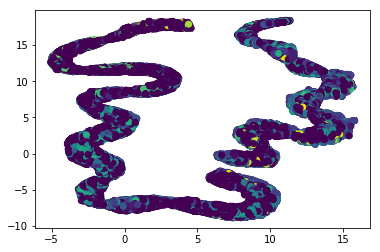

The silhoutte score is: 0.20056317341890148


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [28]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=1, min_samples=10)

%timeit dbscan_cluster.fit(df_scaler)

clusters = dbscan_cluster.fit_predict(df_scaler)

plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

np.unique(clusters)

2.49 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


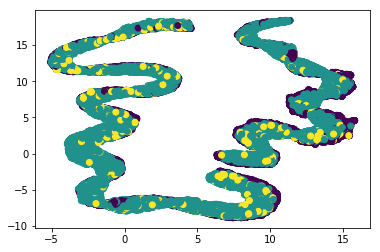

The silhoutte score is: 0.0793039358187623


array([0, 1, 2], dtype=int64)

In [29]:
# GMM 

from sklearn.mixture import GaussianMixture

gmm_cluster = GaussianMixture(n_components=3, random_state=123)

%timeit gmm_cluster.fit(df_scaler)

clusters = gmm_cluster.fit_predict(df_scaler)


plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

print("The silhoutte score is: {}"
      .format(metrics.silhouette_score(df_scaler, clusters, metric='euclidean')))

np.unique(clusters)


K means is the best performer due to:
1. fastest speed
2. has the most clear graph for different clusters
3. silhoutte score
    -tho DBSCAN has the highest silhoutte score, this method generates 276 clsters, which is not the most effective compared to k means
    
    
based on the clustering results we are able to put labels on the dataset and divide the dimonds into two classes. from there we can see what patterns are there in each group such as the group with high prices is also the group with high carat/clarity etc. Further more, it could help saler to set price or do the marketing.
